# Data Mining Challenge

#### Jiyeon Song (A17151720)

In [286]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import re


%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
pd.options.display.max_columns = None

Assignment Submission Page: https://www.kaggle.com/competitions/ucsd-dsc190-wi23-introduction-to-data-mining/

In [287]:
df = pd.read_csv("train.csv")
df

C:\Users\jyson\AppData\Local\Temp\ipykernel_21672\1862463380.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,country_code,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,22267382,Modern and Cozy Large Studio in Brooklyn,Modern large studio with new amenities and app...,Our place is a little quiet sanctuary in the h...,Modern large studio with new amenities and app...,none,"BAM, Barclays, Brooklyn City Point, Fort Green...",NaN,"Subway: 2,3,4,5,A,C,B,Q,G",Washer/Dryer Dishwasher Internet Gym Roof Top ...,"Depending on the time of your visit, I'll be h...","- Please be respectful of our neighbors, no lo...",1910170,Katarina,2012-03-12,"Los Angeles, California, United States","Traveler, Artist, Philanthropist",NaN,NaN,NaN,f,Fort Greene,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Fort Greene,Brooklyn,Brooklyn,NY,11217.0,New York,US,United States,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Gym,Breakfast...",NaN,145.0,2,$30.00,7,12,6,2018-01-01,2018-07-03,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,flexible,f,f,1,0.59
1,2473861,Royal Harlem TRIPLEX Home 5 Beds,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,none,HARLEM is a piece of real NY history overflowi...,HARLEM RESTAURANTS Red Rooster Harlem -- excel...,PUBLIC TRANSPORTATION: Conveniently near all p...,The WHOLE ENTIRE HOUSE,NaN,"Smoking, pets and unaccounted guests NOT permi...",8826175,Grover,2013-09-14,"New York, New York, United States",As the owners of the property we have realized...,within an hour,100%,NaN,f,Mid-Wilshire,4.0,"['email', 'phone', 'reviews', 'manual_offline']",t,t,Harlem,Manhattan,New York,NY,10027.0,New York,US,United States,House,Entire home/apt,8,1.0,3.0,5.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",NaN,175.0,3,$19.00,3,30,137,2014-04-15,2018-10-20,91.0,9.0,9.0,9.0,9.0,9.0,9.0,t,f,moderate,f,f,3,2.47
2,25079703,Sunny East Village Studio,"Clean, hip and well designed sun drenched East...",This is a rare East Village studio with it's h...,"Clean, hip and well designed sun drenched East...",none,East Village is one of the last remaining neig...,NaN,NaN,You'll have access to the entire space - it's ...,"Very responsive via phone call, text or email.",NaN,4383563,Zander,2012-12-11,"New York, New York, United States","New York City based, currently working as a te...",within a few hours,100%,NaN,f,East Village,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,East Village,Manhattan,New York,NY,10009.0,New York,US,United States,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,""S...",NaN,180.0,1,$0.00,2,1125,3,2018-07-26,2018-10-14,100.0,10.0,9.0,9.0,10.0,10.0,10.0,f,f,moderate,f,f,1,0.89
3,9342478,"Beautiful, airy, light-filled room","Private, spacious, comfortable room in 2-bed f...","Big closet, two big windows, tall ceiling and ...","Private, spacious, comfortable room in 2-bed f...",none,One block from Morgan L stop. Super cool area....,NaN,NaN,NaN,NaN,NaN,10406276,Kathleen,2013-12-03,"New York, New York, United States",Aus

## GOAL
#### Predicting the BEST price

## PLANS

#### what features can I use?
* **id(int)**
* description(str) - not sure
* neighborhood_overview(str) - not sure
* transit(str) - not sure
* access(str) - not sure
* **host_is_superhost(bool)** - true & false
* neighbourhood_group_cleansed(str) - 
* **property_type(str)** - category
* **room_type(str)** - category
* accommodates(int) - guest nums
* **bathrooms(int)**
* **bedrooms(int)**
* **beds(int)**
* **amanities(str)** - can categorize
* **price(int)**
* minimum_nights(int) - not sure
* **review_scores_rating(float) - out of 100**
* review_scores_accuracy(float) - out of 10
* **review_scores_cleanliness(float) - out of 10**
* **review_scores_location(float) - out of 10**
* cancellation_policy(str) - category
* reviews_per_month(int)


In [288]:
from math import isnan

# to convert into float
def to_float(s):
    try:
        ret = float(s)
    except:
        ret = -1
    if isnan(ret):
        ret = -1
    return ret

# to convert into integer
def to_int(s):
    try:
        ret = int(s)
    except:
        ret = -1
    return ret

# to group by its categories
categories = [x for x in list(set(df['neighbourhood_group_cleansed'])) if type(x) is str]
# print(len(categories))

# choose features that I am going to use
def create_feature(row):
    guest_num = to_int(row.guests_included)
    guest_cap = to_int(row.extra_people)
    bedrooms = to_int(row.bedrooms)
    bathrooms = to_int(row.bathrooms)
    review = to_float(row.review_scores_rating)
    one_hot = [int(row.neighbourhood_group_cleansed == category) for category in categories]
    
    return [guest_num, guest_cap, bedrooms, bathrooms, review] + one_hot

# set features(list above) and target(price)
train_X, train_y = [], []
for (idx, row) in df.iterrows():
    price = float(row.price)
    features = create_feature(row)

    train_X.append(features)
    train_y.append(price)

print(len(train_X), len(train_y))

33538 33538


In [289]:
df_clean = df[['id', 'host_is_superhost', 'neighbourhood_group_cleansed', \
    'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'bed_type', \
    'price', 'guests_included', 'number_of_reviews', 'review_scores_rating', \
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', \
    'review_scores_communication', 'review_scores_location', 'review_scores_value']]
df_clean

,id,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,22267382,f,Brooklyn,Loft,Entire home/apt,1.0,1.0,1.0,Real Bed,145.0,2,6,100.0,10.0,10.0,10.0,10.0,10.0,10.0
1,2473861,f,Manhattan,House,Entire home/apt,1.0,3.0,5.0,Real Bed,175.0,3,137,91.0,9.0,9.0,9.0,9.0,9.0,9.0
2,25079703,f,Manhattan,Apartment,Entire home/apt,1.0,0.0,1.0,Real Bed,180.0,1,3,100.0,10.0,9.0,9.0,10.0,10.0,10.0
3,9342478,f,Brooklyn,Apartment,Private room,1.0,1.0,1.0,Real Bed,42.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4866426,t,Brooklyn,Apartment,Private room,1.0,1.0,1.0,Real Bed,80.0,1,144,97.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,3958032,f,Manhattan,Apartment,Private room,1.0,1.0,1.0,Real Bed,110.0,1,19,87.0,9.0,8.0,9.0,9.0,9.0,8.0
33534,7987209,f,Manhattan,Serviced apartment,Entire home/apt,3.0,4.0,4.0,Real Bed,1195.0,1,86,95.0,10.0,9.0,10.0,10.0,10.0,9.0
33535,796128,f,Queens,House,Private room,NaN,1.0,1.0,Real Bed,50.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33536,17281121,f,Manhattan,Apartment,Private room,1.0,1.0,1.0,Real Bed,60.0,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0


## data cleaning

In [290]:
df_clean.host_is_superhost = df_clean.host_is_superhost.replace({'f':False, 't':True})

C:\Users\jyson\AppData\Local\Temp\ipykernel_21672\3988477331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.host_is_superhost = df_clean.host_is_superhost.replace({'f':False, 't':True})


In [291]:
# def clean_amenities(row):
#     return row.strip('{').strip('}').split(', ')
# df_clean = df_clean.assign(amenity = df_clean['amenities'].apply(clean_amenities))
# df_clean# = df_clean.drop(columns=['amenities'])

In [292]:
df_clean

,id,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,22267382,False,Brooklyn,Loft,Entire home/apt,1.0,1.0,1.0,Real Bed,145.0,2,6,100.0,10.0,10.0,10.0,10.0,10.0,10.0
1,2473861,False,Manhattan,House,Entire home/apt,1.0,3.0,5.0,Real Bed,175.0,3,137,91.0,9.0,9.0,9.0,9.0,9.0,9.0
2,25079703,False,Manhattan,Apartment,Entire home/apt,1.0,0.0,1.0,Real Bed,180.0,1,3,100.0,10.0,9.0,9.0,10.0,10.0,10.0
3,9342478,False,Brooklyn,Apartment,Private room,1.0,1.0,1.0,Real Bed,42.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4866426,True,Brooklyn,Apartment,Private room,1.0,1.0,1.0,Real Bed,80.0,1,144,97.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,3958032,False,Manhattan,Apartment,Private room,1.0,1.0,1.0,Real Bed,110.0,1,19,87.0,9.0,8.0,9.0,9.0,9.0,8.0
33534,7987209,False,Manhattan,Serviced apartment,Entire home/apt,3.0,4.0,4.0,Real Bed,1195.0,1,86,95.0,10.0,9.0,10.0,10.0,10.0,9.0
33535,796128,False,Queens,House,Private room,NaN,1.0,1.0,Real Bed,50.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33536,17281121,False,Manhattan,Apartment,Private room,1.0,1.0,1.0,Real Bed,60.0,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0


In [293]:
df_clean.columns

Index(['id', 'host_is_superhost', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'guests_included', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

<AxesSubplot:>

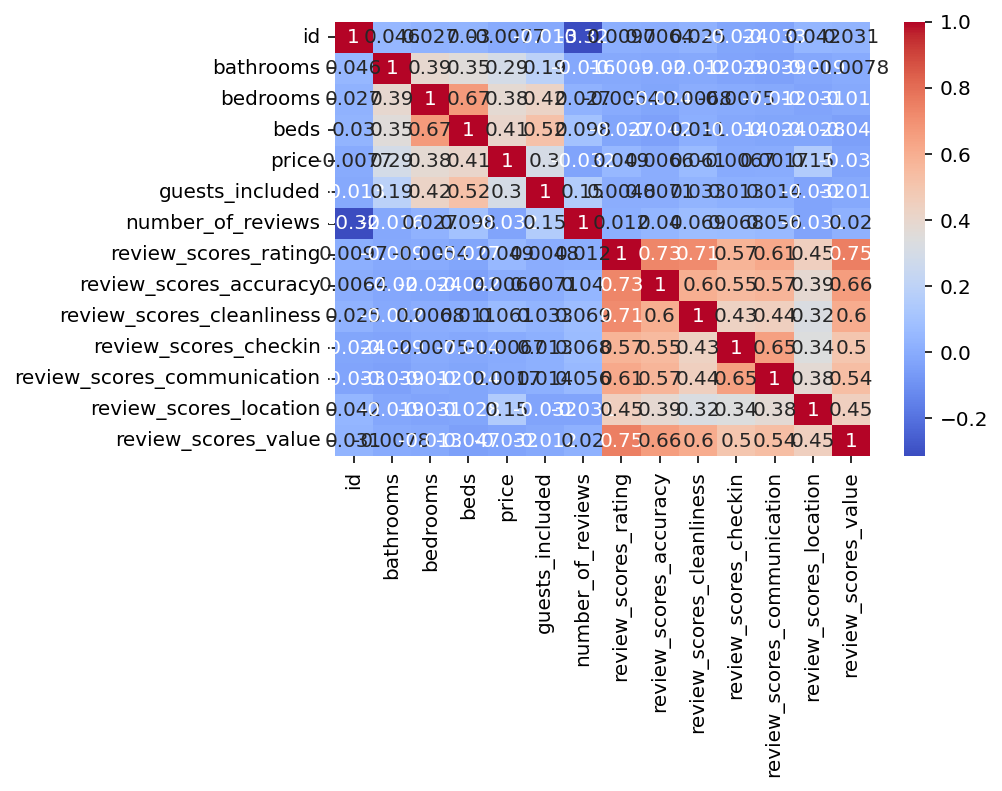

In [294]:
numeric_cols = df_clean.select_dtypes(include = ['float', 'int']).columns
corr_matrix = df_clean[numeric_cols].corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True)

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

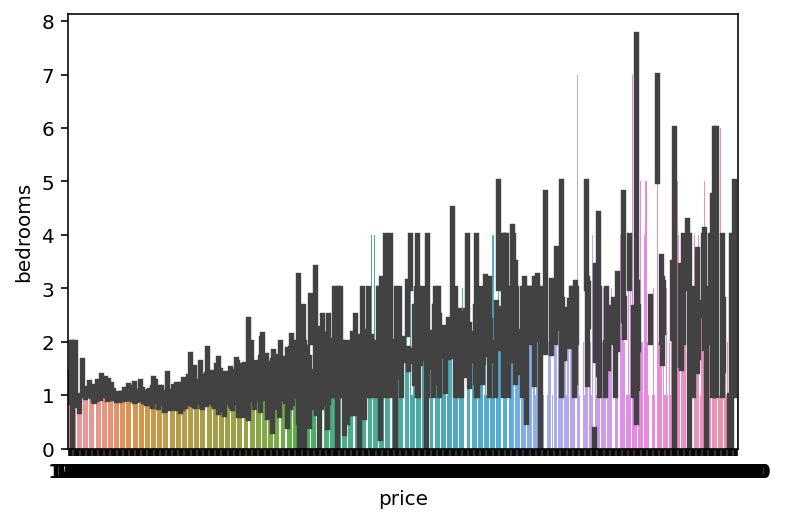

In [295]:
sns.barplot(data=df_clean, x = 'price', y = 'bedrooms')

## model

In [296]:
# Define the column transformer
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])
def select_columns(data):
    num_cols = ['bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_value']
    cat_cols = ['host_is_superhost', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type']
    data = data[num_cols + cat_cols].set_index('id')
    data_clean = pd.get_dummies(data, columns = cat_cols, dummy_na=True)
    return data_clean
df_clean = select_columns(df_clean)

KeyError: "None of ['id'] are in the columns"

In [ ]:
from sklearn.pipeline import Pipeline, make_union
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
from sklearn.model_selection import train_test_split
X = df_clean.drop('price', axis=1)
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='median'), X.columns),
        # ('num', StandardScaler(), ['bathrooms', 'bedrooms', 'beds']), 
        # ('num', StandardScaler(), ['bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_value'])
        # ('cat', OneHotEncoder(handle_unknown='ignore'), ['host_is_superhost', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type']), 
        # ('word', TfidfVectorizer(), ['summary'])
        ], remainder='passthrough')
preprocessor.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer', SimpleImputer(strategy='median'),
                                 Index(['bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value...
       'property_type_Tent', 'property_type_Timeshare',
       'property_type_Tiny house', 'property_type_Townhouse',
       'property_type_Train', 'property_type_Villa', 'property_type_nan',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'room_type_nan', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'bed_type_nan'],
      dtype='object'))])

In [ ]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer(), ['bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_value']),
#         ('cat', categorical_transformer(), ['host_is_superhost', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type']), 
#         # ('word', TfidfVectorizer(), ['summary'])
#         # ('imputer', SimpleImputer(strategy='most_frequent'))
#         ], remainder='passthrough')
# preprocessor.fit(X)

In [ ]:
# Define the pipeline including preprocessing and model
pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('regressor', HistGradientBoostingRegressor())
    ])

In [ ]:
pipeline.fit(X_train, y_train)
# np.isnan(preprocessor.transform(X_train)).sum(axis=0)
# # X_train['bathrooms'].isna().sum()
# X_train['bathrooms'].isna().sum()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_score...
       'property_type_Tiny house', 'property_type_Townhouse',
       'property_type_Train', 'property_type_Villa', 'property_type_nan',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'room_type_nan', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'bed_type_nan'],
      dtype='object'))])),
                ('regressor', HistGradientBoostingRe

### Testing for Overfitting

In [ ]:
# testing train set
predict_train = pipeline.predict(X_train)
# rmse
def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred)**2))
# test set should have less root mean squared error
rmse(y_train, predict_train)


88.00241327892105

## TEST

In [ ]:
test_df = pd.read_csv('test.csv')
test_df

C:\Users\jyson\AppData\Local\Temp\ipykernel_21672\2079203658.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('test.csv')


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,country_code,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,electronic lock ensures 24 hour check-in,NaN,105703386,Derek,2016-11-30,"New York, New York, United States",NaN,NaN,NaN,NaN,f,Battery Park City,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,Battery Park City,Manhattan,New York,NY,10004.0,New York,US,United States,Condominium,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",NaN,1,$0.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
1,20176193,Vintage Eclectic Brownstone Pad in Brooklyn,"Ideal for romantic, creative types, this is an...","Not your typical New York abode, my apartment ...","Ideal for romantic, creative types, this is an...",none,Bed Stuy is a diverse historic neighborhood wi...,This is an actual unique living experience whe...,Close to buses and subways there is also free ...,"Entrance hallway, living room, bedroom, kitche...",I'm very social but understand the need for my...,Hi there. Thank you so much for taking the tim...,10208778,Russell,2013-11-23,"New York, New York, United States",I am an artist and small business owner in Bro...,within a day,90%,NaN,f,NaN,1.0,"['email', 'phone', 'reviews', 'work_email']",t,f,Bedford-Stuyvesant,Brooklyn,Brooklyn,NY,11216.0,New York,US,United States,Apartment,Entire home/apt,2,1.0,2.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,1,$0.00,2,5,22,2017-08-16,2018-10-28,97.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f,flexible,f,f,1,1.48
2,19485371,Spacious Harlem Hideaway,"Postive Vibes . This is our Harlem tree house,...",The private room is very spacious and cozy. Th...,"Postive Vibes . This is our Harlem tree house,...",none,You are in a Cultural Haven full of restaurant...,We also keep cucumber water in the fridge feel...,"Train, uber or a taxi. (Extremely taxi accessi...","Private Room, Kitchen And Bathroom",Very open to communication. If you have any qu...,If you are cooking we request you wash your di...,74238783,Cardelle,2016-05-27,"Washington, District of Columbia, United States",Hey Folks!! My name is cardelle and I'm in sch...,NaN,NaN,NaN,f,Hamilton Heights,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Harlem,Manhattan,New York,NY,10031.0,New York,US,United States,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Smoking allo...",NaN,1,$20.00,1,3,6,2017-07-01,2017-12-15,100.0,10.0,9.0,10.0,10.0,10.0,10.0,t,f,flexible,f,f,1,0.37
3,13079990,Spacius private room in Brooklyn,"Newly renovated apartment, its a 3 bedroom apa...","3 bedroom apartment, 1 full bathroom, living r...","Newly renovated apartment, its a 3 bedroom apa...",none,NaN,NaN,"There is the Mta 3 train Sutter stop, also the...",NaN,NaN,Clean up after yourself.,53324604,Nana,2016-01-04,"New York, New York, United States","Musician Resi

In [ ]:
test_data = select_columns(test_df)
test_data

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,market,country_code,country,accommodates,bathrooms,bedrooms,beds,amenities,square_feet,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,neighbourhood_group_cleansed_nan,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,electronic lock ensures 24 hour check-in,NaN,105703386,Derek,2016-11-30,"New York, New York, United States",NaN,NaN,NaN,NaN,Battery Park City,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,Battery Park City,New York,NY,10004.0,New York,US,United States,4,2.0,2.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",NaN,1,$0.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
20176193,Vintage Eclectic Brownstone Pad in Brooklyn,"Ideal for romantic, creative types, this is an...","Not your typical New York abode, my apartment ...","Ideal for romantic, creative types, this is an...",none,Bed Stuy is a diverse historic neighborhood wi...,This is an actual unique living experience whe...,Close to buses and subways there is also free ...,"Entrance hallway, living room, bedroom, kitche...",I'm very social but understand the need for my...,Hi there. Thank you so much for taking the tim...,10208778,Russell,2013-11-23,"New York, New York, United States",I am an artist and small business owner in Bro...,within a day,90%,NaN,NaN,1.0,"['email', 'phone', 'reviews', 'work_email']",t,f,Bedford-Stuyvesant,Brooklyn,NY,11216.0,New York,US,United States,2,1.0,2.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,1,$0.00,2,5,22,2017-08-16,2018-10-28,97.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f,flexible,f,f,1,1.48,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
19485371,Spacious Harlem Hideaway,"Postive Vibes . This is our Har

In [ ]:
test_data = select_columns(test_df)
test_data

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,market,country_code,country,accommodates,bathrooms,bedrooms,beds,amenities,square_feet,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,neighbourhood_group_cleansed_nan,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,electronic lock ensures 24 hour check-in,NaN,105703386,Derek,2016-11-30,"New York, New York, United States",NaN,NaN,NaN,NaN,Battery Park City,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,Battery Park City,New York,NY,10004.0,New York,US,United States,4,2.0,2.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",NaN,1,$0.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
20176193,Vintage Eclectic Brownstone Pad in Brooklyn,"Ideal for romantic, creative types, this is an...","Not your typical New York abode, my apartment ...","Ideal for romantic, creative types, this is an...",none,Bed Stuy is a diverse historic neighborhood wi...,This is an actual unique living experience whe...,Close to buses and subways there is also free ...,"Entrance hallway, living room, bedroom, kitche...",I'm very social but understand the need for my...,Hi there. Thank you so much for taking the tim...,10208778,Russell,2013-11-23,"New York, New York, United States",I am an artist and small business owner in Bro...,within a day,90%,NaN,NaN,1.0,"['email', 'phone', 'reviews', 'work_email']",t,f,Bedford-Stuyvesant,Brooklyn,NY,11216.0,New York,US,United States,2,1.0,2.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,1,$0.00,2,5,22,2017-08-16,2018-10-28,97.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f,flexible,f,f,1,1.48,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
19485371,Spacious Harlem Hideaway,"Postive Vibes . This is our Har

In [ ]:
# Save predictions to CSV file
def save_predictions(model):
    ids = test_data.index
    pred = model.predict(test_data)
    
    out = pd.DataFrame(data={'Id': ids, 'Predicted': pred})
    out.to_csv('triple_tka.csv', index=False)